# 第4章原始程式碼

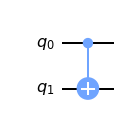

In [1]:
#Program 4.1 Apply CX-gate to qubit
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw('mpl')

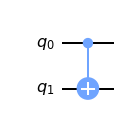

<IPython.core.display.Latex object>

In [2]:
#Program 4.2 Show unitary matrix of CX-gate (MSB as target bit)
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex
qc = QuantumCircuit(2)
qc.cx(0,1)
display(qc.draw('mpl'))
sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
unitary = sim.run(qc).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{CNOT (MSB as target bit) = }"))

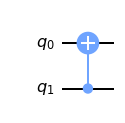

<IPython.core.display.Latex object>

In [3]:
#Program 4.3 Show unitary matrix of CX-gate (LSB as target bit)
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex
sim = Aer.get_backend('aer_simulator')
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw('mpl'))
qc.save_unitary()
unitary = sim.run(qc).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{CNOT (LSB as target bit) = }"))

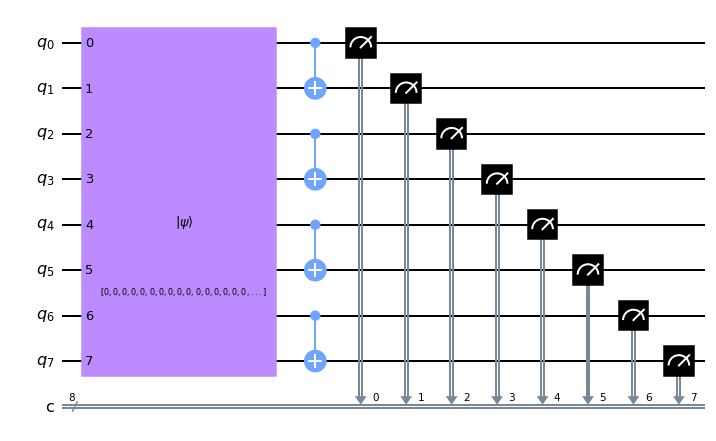

In [4]:
#Program 4.4a Appliy CX-gate to qubit
from qiskit import QuantumCircuit,execute
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(8,8)
sv = Statevector.from_label('11011000')
qc.initialize(sv,range(8))
qc.cx(0,1)
qc.cx(2,3)
qc.cx(4,5)
qc.cx(6,7)
qc.measure(range(8),range(8))
qc.draw('mpl')

Counts: {'01111000': 1000}


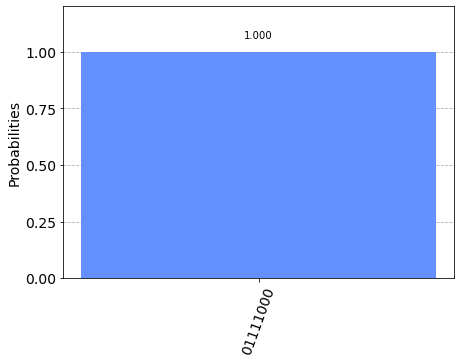

In [5]:
#Program 4.4b Measure state of qubit w/ CX-gate
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

Below is the Bell state (top: q0 for target; bottom: q1 for control):


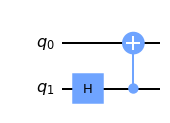

Below is the Bell state (top: q1 for control; bottom: q0 for traget):


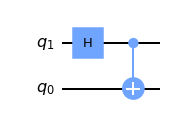

In [6]:
#Program 4.5 Build Bell state via H- and CX-gate
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
print("Below is the Bell state (top: q0 for target; bottom: q1 for control):")
display(qc.draw('mpl'))
print("Below is the Bell state (top: q1 for control; bottom: q0 for traget):")      
display(qc.draw('mpl',reverse_bits=True))

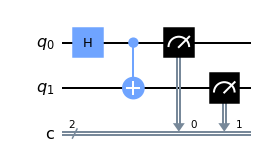

In [7]:
#Program 4.6a Build Bell state via H- and CX-gate
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure(range(2),range(2))
qc.draw('mpl')

Counts: {'00': 496, '11': 504}


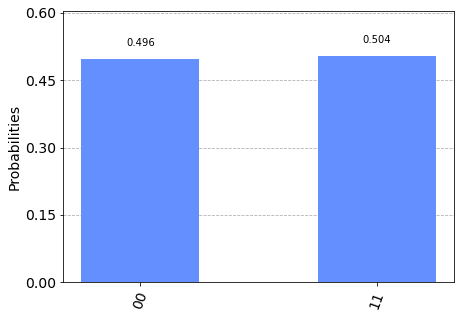

In [8]:
#Program 4.6b Measure state of qubit in Bell state
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

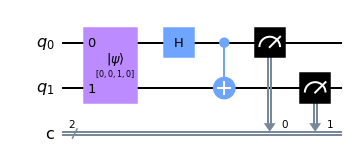

In [9]:
#Program 4.7a Iinitialize qubit and build Bell state via H- and CX-gate
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(2,2)
sv = Statevector.from_label('10')
qc.initialize(sv,range(2))
qc.h(0)
qc.cx(0,1)
qc.measure(range(2),range(2))
qc.draw('mpl')

Counts: {'10': 483, '01': 517}


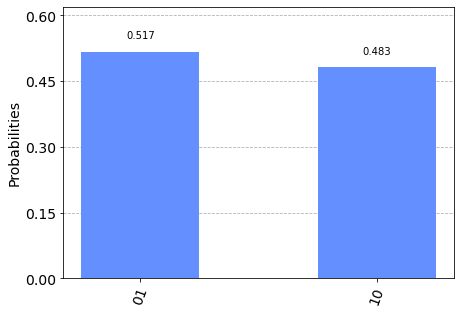

In [10]:
#Program 4.7b Measure state of qubit in Bell state
from qiskit import execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

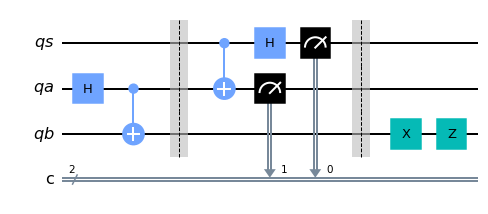

In [11]:
#Program 4.8 Show quantum circuit for quantum teleportation
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qs = QuantumRegister(1,'qs')
qa = QuantumRegister(1,'qa')
qb = QuantumRegister(1,'qb')
cr = ClassicalRegister(2,'c')
qc = QuantumCircuit(qs,qa,qb,cr)
qc.h(qa)
qc.cx(qa,qb)
qc.barrier()
qc.cx(qs,qa)
qc.h(qs)
qc.measure(qs,0)
qc.measure(qa,1)
qc.barrier()
qc.x(qb)
qc.z(qb)
qc.draw('mpl')

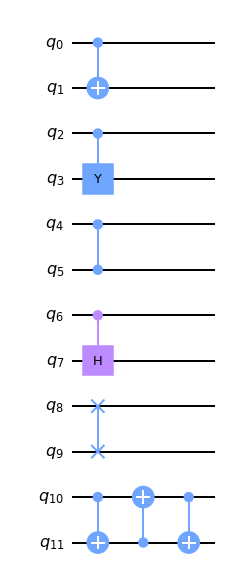

In [12]:
#Program 4.9 Apply CX-, CY-, CZ-, CH-, and SWAP-gate to qubit 
from qiskit import QuantumCircuit
qc = QuantumCircuit(12)
qc.cx(0,1)
qc.cy(2,3)
qc.cz(4,5)
qc.ch(6,7)
qc.swap(8,9)
qc.cx(10,11)
qc.cx(11,10)
qc.cx(10,11)
qc.draw('mpl')

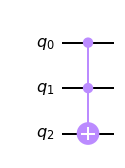

In [13]:
#Program 4.10 Apply CCX-gate to qubit
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
qc.draw('mpl')

Below is quantum circuit of CCNOT gate (MSB as target bit):


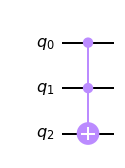

<IPython.core.display.Latex object>

Below is quantum circuit of CCNOT gate (LSB as target bit):


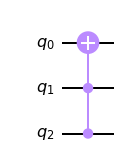

<IPython.core.display.Latex object>

In [14]:
#Program 4.11 Show unitary matrix of CCX-gate
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import array_to_latex
sim = Aer.get_backend('aer_simulator')
qc1 = QuantumCircuit(3)
qc1.ccx(0,1,2)
print("="*70,"\nBelow is quantum circuit of CCNOT gate (MSB as target bit):")
display(qc1.draw('mpl'))
qc1.save_unitary()
unitary = sim.run(qc1).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{CCNOT (MSB as target bit) = }\n"))
qc2 = QuantumCircuit(3)
qc2.ccx(2,1,0)
print("="*70,"\nBelow is quantum circuit of CCNOT gate (LSB as target bit):")
display(qc2.draw('mpl'))
qc2.save_unitary()
unitary = sim.run(qc2).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{CCNOT (LSB as target bit) = }\n"))

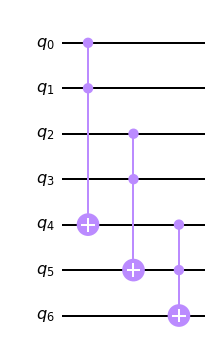

In [15]:
#Program 4.12 Apply CCCCX-gate to qubit
from qiskit import QuantumCircuit
qc = QuantumCircuit(7)
qc.ccx(0,1,4)
qc.ccx(2,3,5)
qc.ccx(4,5,6)
qc.draw('mpl')